root
 |-- track_name: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- streams: integer (nullable = true)
 |-- rank: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- date: date (nullable = true)

+-----------------+-------------+---------+----+-------+----------+
|       track_name|       artist|  streams|rank|country|      date|
+-----------------+-------------+---------+----+-------+----------+
|  Blinding Lights|   The Weeknd|320450123|   1|    USA|2025-01-01|
|     Shape of You|   Ed Sheeran|295670890|   2|    USA|2025-01-01|
|     Dance Monkey|  Tones and I|280123456|   3|    USA|2025-01-01|
|Someone You Loved|Lewis Capaldi|265789123|   4|    USA|2025-01-01|
|        Sunflower|  Post Malone|250234567|   5|    USA|2025-01-01|
+-----------------+-------------+---------+----+-------+----------+
only showing top 5 rows



<ipython-input-14-ae6e1d2d2ac8>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sum(streams)",y="track_name",data=top_tracks_pandas,palette="viridis")


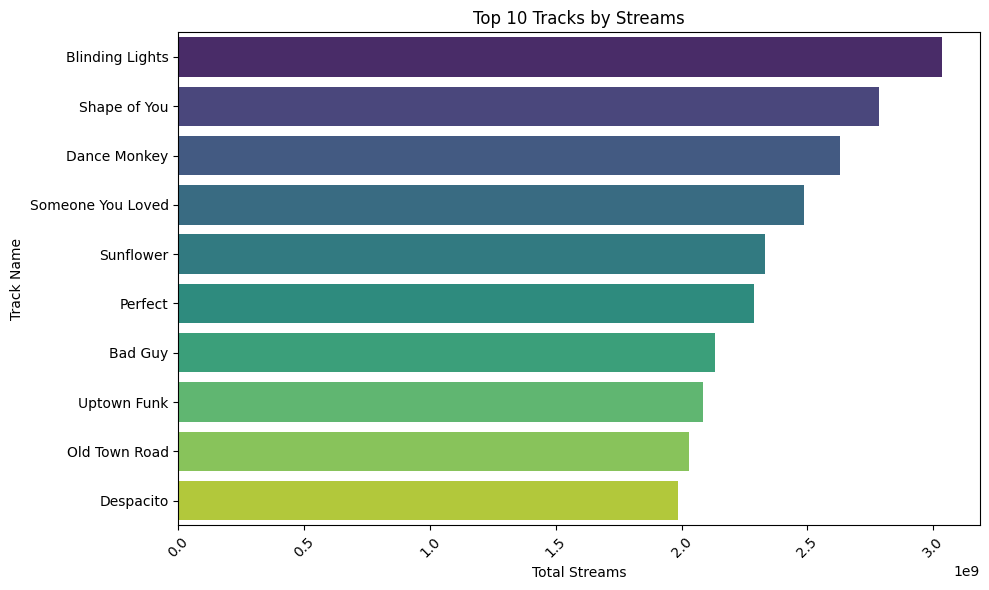

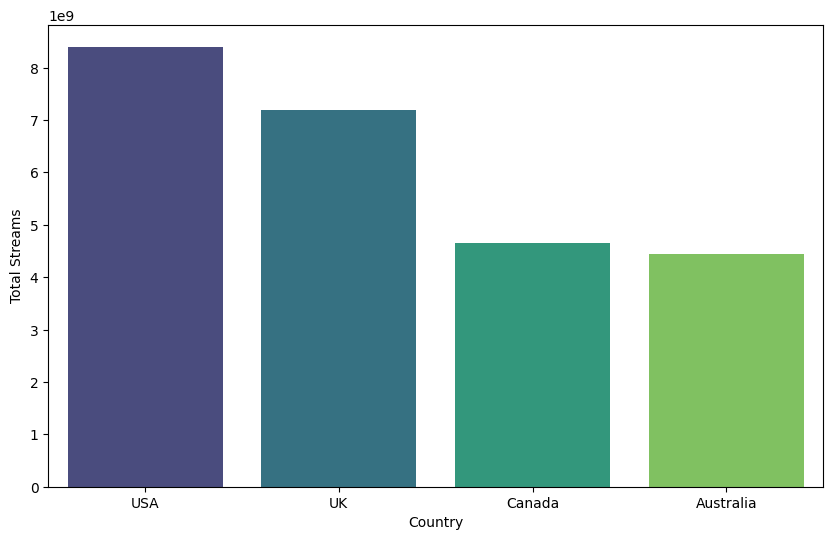

In [14]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,desc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

spark = SparkSession.builder.appName("SpotifyStreamingAnalysis").getOrCreate()
# uploading the dataset
file_path = '/content/spotify_data.csv'
df = spark.read.csv(file_path, header=True, inferSchema=True)
#display schema and first five rows
df.printSchema()
df.show(5)
#cleaning data
df_clean= df.dropna(subset=["track_name","artist","streams","country","rank"])

# top 10 tracks by streams
top_tracks=df_clean.groupBy("track_name","artist").sum("streams").orderBy(desc("sum(streams)")).limit(10)
#convert to pandas for visualizing
top_tracks_pandas=top_tracks.toPandas()

#anaylsis for top tracks
plt.figure(figsize=(10,6))
sns.barplot(x="sum(streams)",y="track_name",data=top_tracks_pandas,palette="viridis")
plt.xlabel("Total Streams")
plt.ylabel("Track Name")
plt.title("Top 10 Tracks by Streams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# anaylsis for top countries
plt.figure(figsize=(10,6))
sns.barplot(x="country",y="sum(streams)",hue="country",data=df_clean.groupBy("country").sum("streams").orderBy(desc("sum(streams)")).toPandas(),palette="viridis")
plt.xlabel("Country")
plt.ylabel("Total Streams")
plt.show()

#stop spark session
spark.stop()